In [1]:
import respyrar as rs
import matplotlib.pyplot as plt
import pandas as pd 
import ee

# Definitions
We define some elements we will need later.
You can add whichever elements you find useful

## Dates

In [4]:
jan19 = '2019-01-01'
march19 = '2019-03-01'
may19 = '2019-05-01'
jan21 = '2021-01-01'

## Geographic data
Originally for Buenos Aires

In [5]:
lat_n=-34.52
lat_s=-34.73
lon_w=-58.56
lon_e=-58.33

arg_shapefile = "../data/arg/departamento.shp" 

ba_roi = rs.geometry_rectangle(lon_w,lat_s,lon_e,lat_n) #roi stands for Region Of Interest

## Google Earth Engine elements

In [6]:
reds = [ee.Reducer.mean(), ee.Reducer.min()] # the spatial reducers we'll be using
names = ['NO2_trop_mean','NO2_trop_min'] # their names

## Test functions

In [7]:
def test_time_series(start, end, roi): 
    
    df = rs.time_series_df(roi,start,end,filename='raw.csv',reducers = reds, red_names = names)
    df_daily = rs.ts_dailydf(df, filename= 'daily.csv')
    df_weekly = rs.ts_weeklydf(df, filename= 'weekly.csv')
    df_monthly = rs.ts_monthlydf(df, filename= 'monthly.csv')

    return df, df_daily, df_weekly, df_monthly

def test_tseries_median(df):
    median_daily = rs.ts_dailydf(df, statistic = 'median')
    median_weekly = rs.ts_weeklydf(df, statistic = 'median')
    median_monthly = rs.ts_monthlydf(df, statistic = 'median')

    return median_daily, median_weekly, median_monthly


# Let's go!

Obtain dataframes with NO2 time series. Aggregate using mean

In [8]:
df, df_d, df_w, df_m = test_time_series(march19, may19, ba_roi)
df


,NO2_trop_mean,NO2_trop_min,Timestamp,Year,Month,Day,Weekday
0,0.000068,-2.180460e-06,2019-03-01 17:10:41,2019,3,1,4
1,0.000075,2.936113e-05,2019-03-02 16:51:46,2019,3,2,5
2,0.000022,-7.693841e-06,2019-03-03 16:32:51,2019,3,3,6
3,0.000037,1.311450e-05,2019-03-03 18:14:21,2019,3,3,6
4,0.000064,4.535062e-07,2019-03-05 17:36:31,2019,3,5,1
5,0.000104,-6.414174e-07,2019-03-06 17:17:35,2019,3,6,2
6,0.000114,2.438222e-05,2019-03-07 16:58:40,2019,3,7,3
7,0.000053,2.419750e-05,2019-03-08 16:39:45,2019,3,8,4
8,0.000044,2.912181e-05,2019-03-08 18:21:15,2019,3,8,4
9,0.000055,3.232253e-05,2019-03-09 18:02:20,2019,3,9,5


Show and save plots for these series

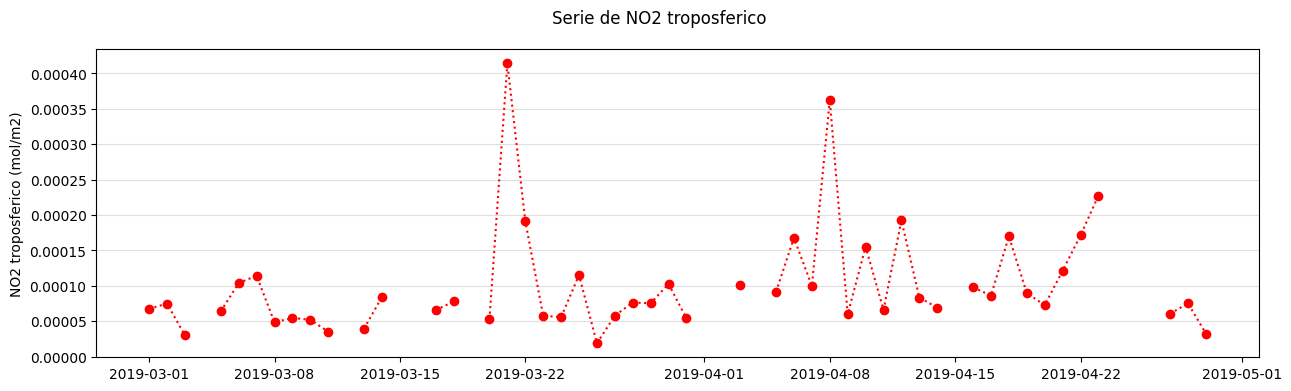

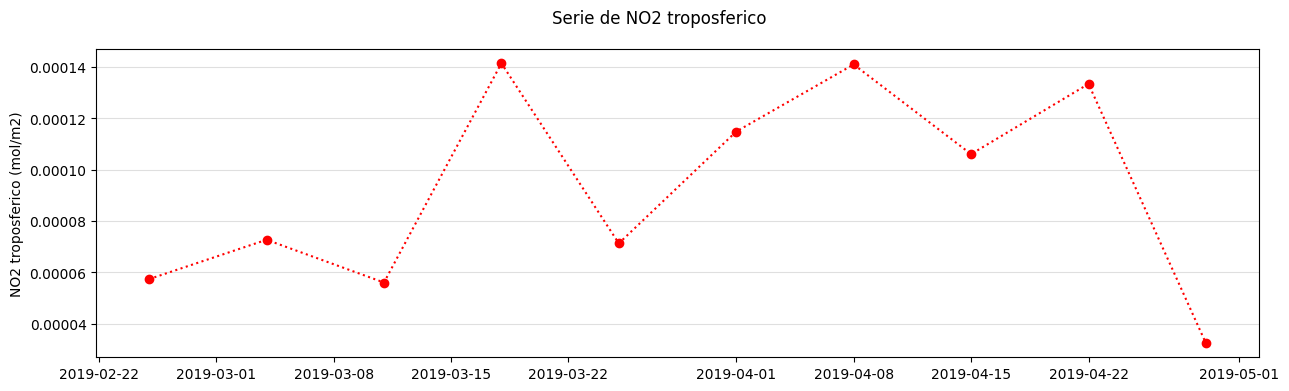

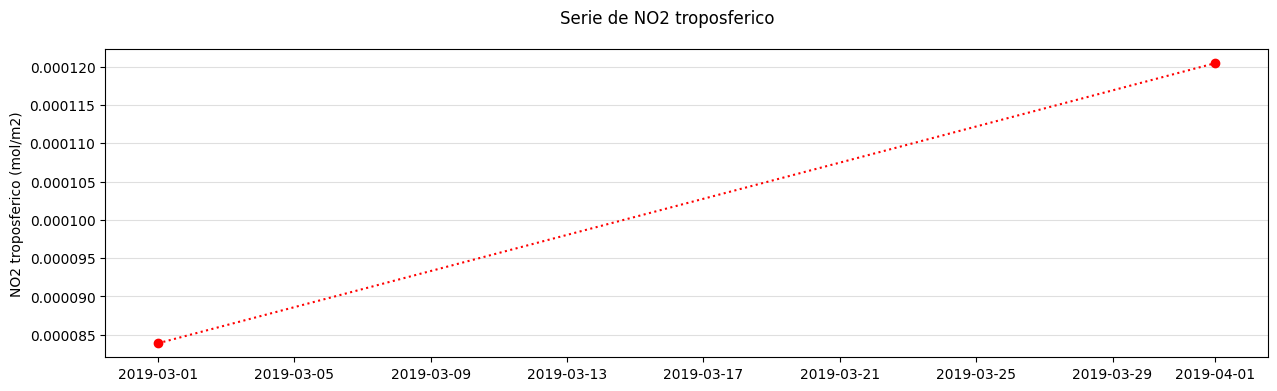

(<Figure size 1500x400 with 1 Axes>,
 <AxesSubplot: ylabel='NO2 troposferico (mol/m2)'>)

In [9]:
fig, ax = rs.plot_series(df_d,show = True) #save with default name: series.png
rs.plot_series(df_w, filename = 'weekly.png', show = True)
rs.plot_series(df_m, filename = 'monthy.png', show = True)

Change title to matplotlib object and save again

In [10]:
fig.suptitle("Daily series of tropospheric NO2")
fig.savefig('daily_again.png',bbox_inches='tight',dpi=500)

Recalculate NO2 time series, now using median to aggregate

In [11]:
median_d, median_w, median_m = test_tseries_median(df)

Show or save plots for these series

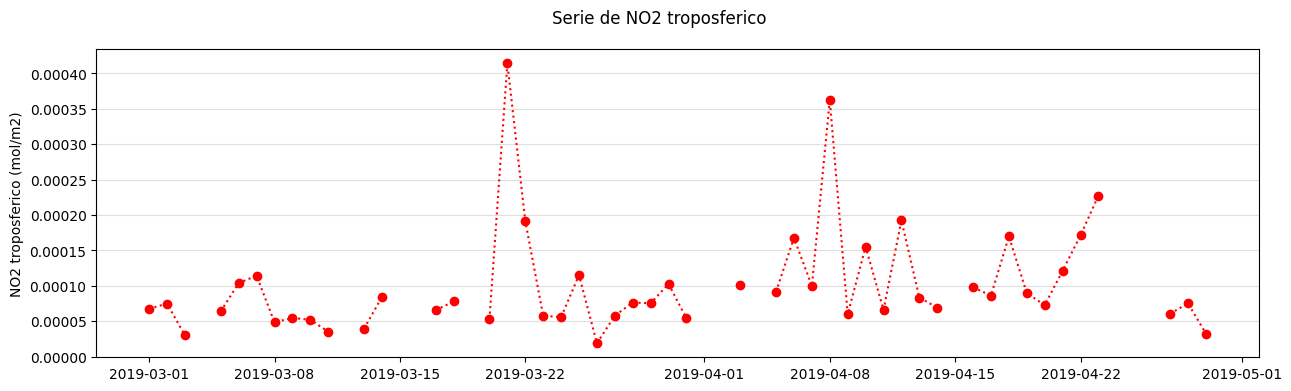

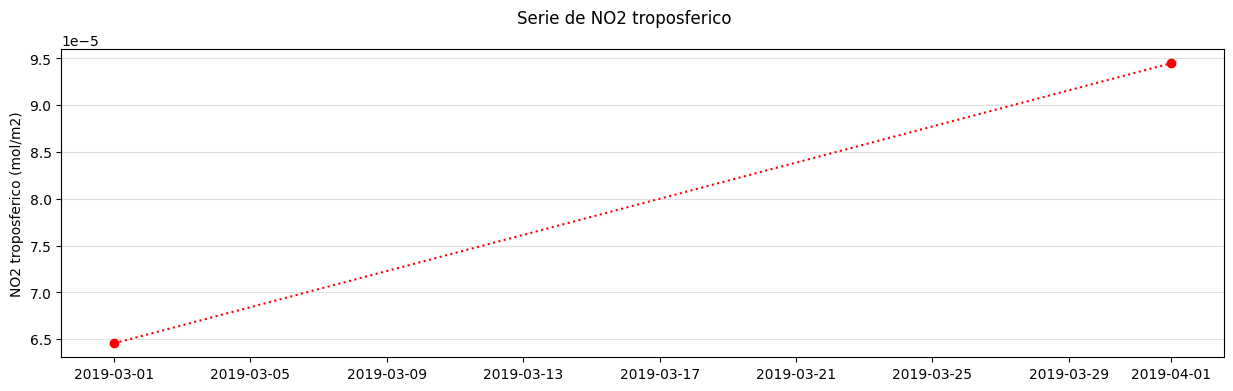

(<Figure size 1500x400 with 1 Axes>,
 <AxesSubplot: ylabel='NO2 troposferico (mol/m2)'>)

In [12]:
fig, ax = rs.plot_series(median_d,show = True) #show and save with default name: series.png
rs.plot_series(median_w, filename = 'median_weekly.png') #save, don't show
rs.plot_series(median_m, show = True, save = False) #show, don't save

Show autocorrelogram for daily series

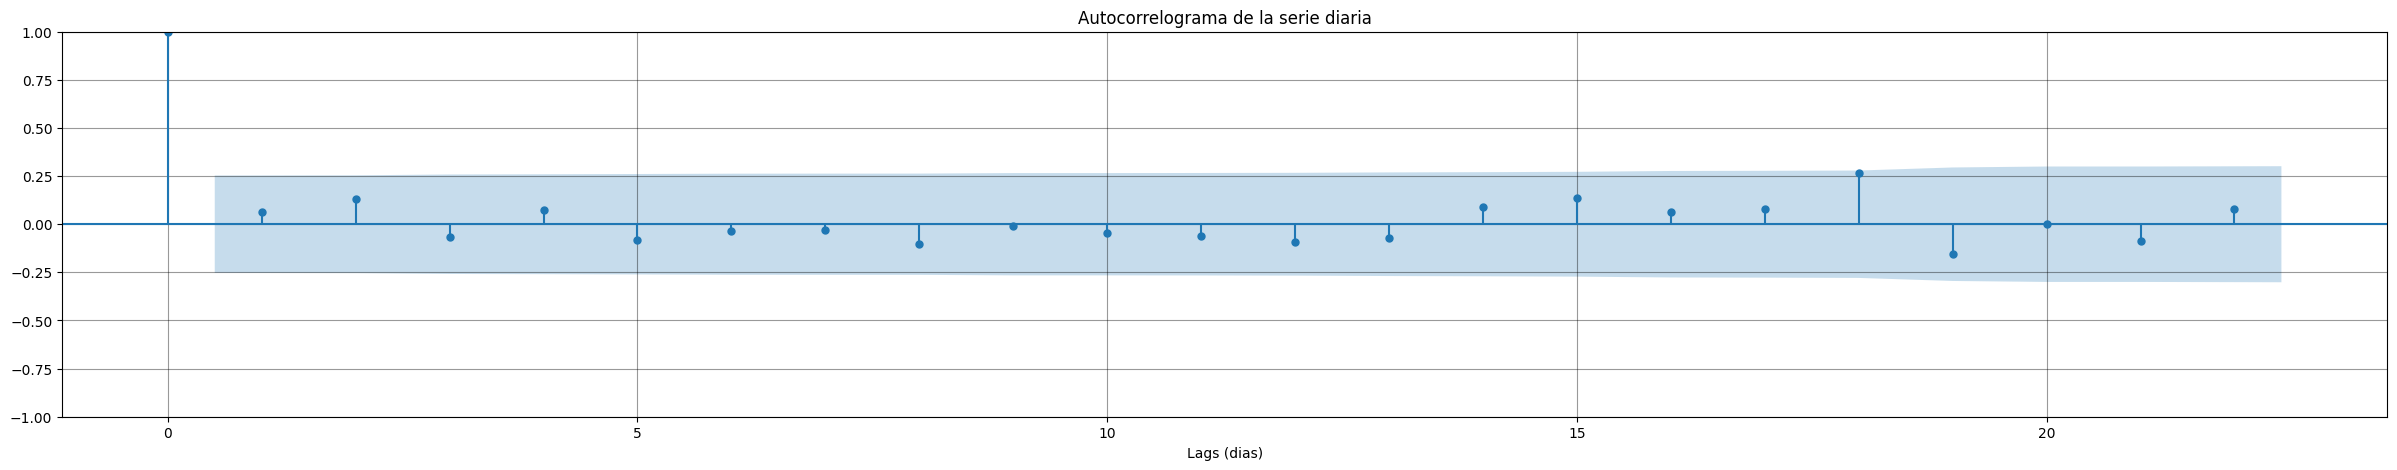

(<Figure size 3000x500 with 1 Axes>,
 <AxesSubplot: title={'center': 'Autocorrelograma de la serie diaria'}, xlabel='Lags (dias)'>)

In [13]:
rs.plot_autocorr(df_d, lags = 22, show = True, save = False)

## Long case 

Get series for 2019 and 2020

In [14]:
long_df = rs.time_series_df(ba_roi,jan19,jan21,filename='long_raw.csv',reducers = reds, red_names = names)
long_monthly = rs.ts_monthlydf(long_df, filename= 'long_monthly.csv')


Load monthly series from csv and plot a bar plot comparing years

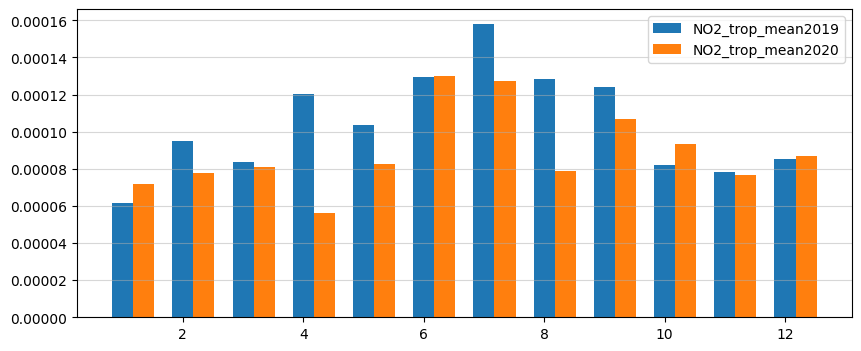

(<Figure size 1000x400 with 1 Axes>, <BarContainer object of 12 artists>)

In [15]:
df_monthly = pd.read_csv('long_monthly.csv')
rs.barplot_year_cmp(df_monthly, 2019, 2020, show = True) 


In [16]:
var = rs.interanual_variation(df_monthly, 2019, 2020, month_num = 4)
print("Interannual variation for april 2019-2020: ",var)

Interannual variation for april 2019-2020:  -53.14


## Spatial data


Show and save plots for spatial distribution of NO2

/home/martin/testenv/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:801: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


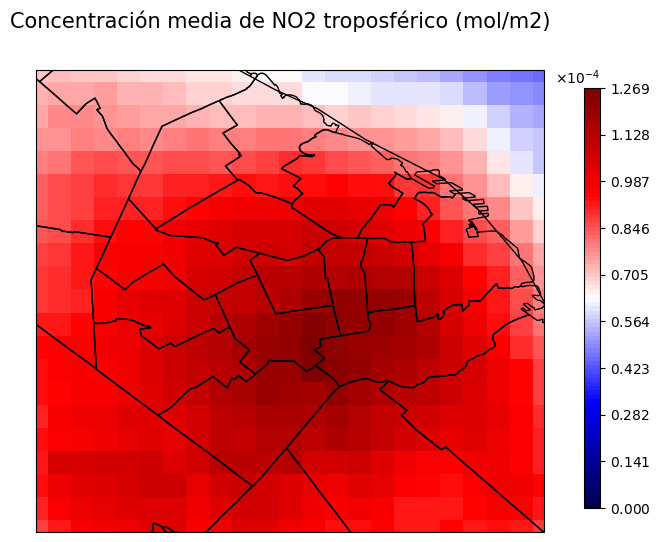

In [17]:
values, lon, lat = rs.space_data_meshgrid(ba_roi, jan19, may19, export = False)
map_fig, _ = rs.plot_map(values, lon, lat, arg_shapefile, show=True)
map_fig.suptitle("Concentrations of NO2 in Buenos Aires")
map_fig.savefig("map.png")